<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Avocado_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np 
import pandas as pd 
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

import timeit
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

In [2]:
!pip install kaggle
!pip install rfpimp
!pip install eli5
!pip install fbprophet

  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp
     |████████████████████████████████| 102kB 3.7MB/s 


In [10]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"ygeszvain","key":"dd372cdf797a4dd2ce42075be6ec8b83"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [13]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [14]:
!kaggle datasets download -d neuromusic/avocado-prices

  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 43.0MB/s]


In [15]:
!unzip datasets/neuromusic/avocado-prices/avocado-prices.zip

Archive:  datasets/neuromusic/avocado-prices/avocado-prices.zip
  inflating: avocado.csv             


In [16]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330,64236.620,1036.740,54454.850,48.160,8696.870,8603.620,93.250,0.000,conventional,2015,Albany
1,1,2015-12-20,1.350,54876.980,674.280,44638.810,58.330,9505.560,9408.070,97.490,0.000,conventional,2015,Albany
2,2,2015-12-13,0.930,118220.220,794.700,109149.670,130.500,8145.350,8042.210,103.140,0.000,conventional,2015,Albany
3,3,2015-12-06,1.080,78992.150,1132.000,71976.410,72.580,5811.160,5677.400,133.760,0.000,conventional,2015,Albany
4,4,2015-11-29,1.280,51039.600,941.480,43838.390,75.780,6183.950,5986.260,197.690,0.000,conventional,2015,Albany


4046 – Hass – small
4225 – Hass – large
4770 – Hass Extra Large

In [17]:
#rename the columns for Prophet
df = df.rename(index=str, columns={"4046": "Hass_small", "4225": "Hass_large", "4770": "Hass_Extra_Large", "Total Volume": "Total_Volume"})
df.head()

,Unnamed: 0,Date,AveragePrice,Total_Volume,Hass_small,Hass_large,Hass_Extra_Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330,64236.620,1036.740,54454.850,48.160,8696.870,8603.620,93.250,0.000,conventional,2015,Albany
1,1,2015-12-20,1.350,54876.980,674.280,44638.810,58.330,9505.560,9408.070,97.490,0.000,conventional,2015,Albany
2,2,2015-12-13,0.930,118220.220,794.700,109149.670,130.500,8145.350,8042.210,103.140,0.000,conventional,2015,Albany
3,3,2015-12-06,1.080,78992.150,1132.000,71976.410,72.580,5811.160,5677.400,133.760,0.000,conventional,2015,Albany
4,4,2015-11-29,1.280,51039.600,941.480,43838.390,75.780,6183.950,5986.260,197.690,0.000,conventional,2015,Albany


In [0]:
df['TotalSales'] = df['AveragePrice'] * df['Total_Volume']

In [19]:
df.describe()

,Unnamed: 0,AveragePrice,Total_Volume,Hass_small,Hass_large,Hass_Extra_Large,Total Bags,Small Bags,Large Bags,XLarge Bags,year,TotalSales
count,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000,18249.000
mean,24.232,1.406,850644.013,293008.425,295154.568,22839.736,239639.202,182194.687,54338.088,3106.427,2016.148,927948.434
std,15.481,0.403,3453545.355,1264989.082,1204120.401,107464.068,986242.399,746178.515,243965.965,17692.895,0.940,3686048.475
min,0.000,0.440,84.560,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2015.000,134.450
25%,10.000,1.100,10838.580,854.070,3008.780,0.000,5088.640,2849.420,127.470,0.000,2015.000,17164.184
50%,24.000,1.370,107376.760,8645.300,29061.020,184.990,39743.830,26362.820,2647.710,0.000,2016.000,139529.758
75%,38.000,1.660,432962.290,111020.200,150206.860,6243.420,110783.370,83337.670,22029.250,132.500,2017.000,514191.414
max,52.000,3.250,62505646.520,22743616.170,20470572.610,2546439.110,19373134.370,13384586.800,5719096.610,551693.650,2018.000,54379912.472


In [24]:
pandas_profiling.ProfileReport(df)

Number of variables,16
Number of observations,18249
Total Missing (%),0.0%
Total size in memory,2.2 MiB
Average record size in memory,128.0 B
Numeric,6
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,6


In [25]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)[:20]

TotalSales         0.000
region             0.000
year               0.000
type               0.000
XLarge Bags        0.000
Large Bags         0.000
Small Bags         0.000
Total Bags         0.000
Hass_Extra_Large   0.000
Hass_large         0.000
Hass_small         0.000
Total_Volume       0.000
AveragePrice       0.000
Date               0.000
Unnamed: 0         0.000
dtype: float64

In [0]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [27]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [28]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [0]:
# Label encoding

lb_make = LabelEncoder()
df["region_code"] = lb_make.fit_transform(df["region"].astype(str))
df["type_code"] = lb_make.fit_transform(df["type"].astype(str))


 mu = 1.41 and sigma = 0.40



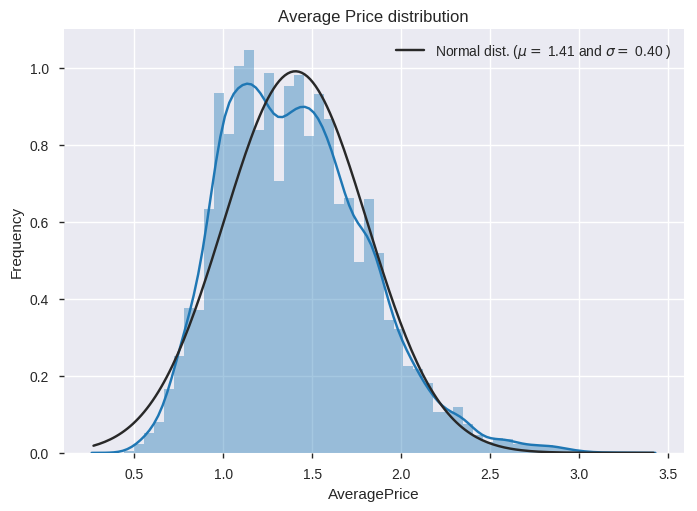

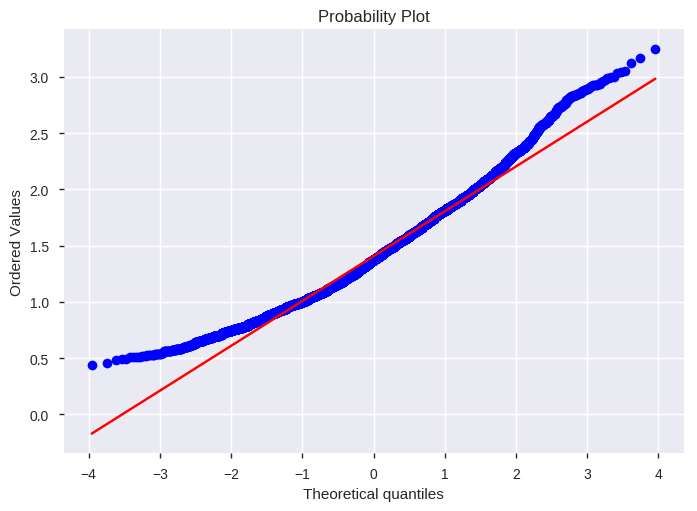

In [30]:
sns.distplot(df['AveragePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['AveragePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Average Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['AveragePrice'], plot=plt)
plt.show();


 mu = 0.86 and sigma = 0.16



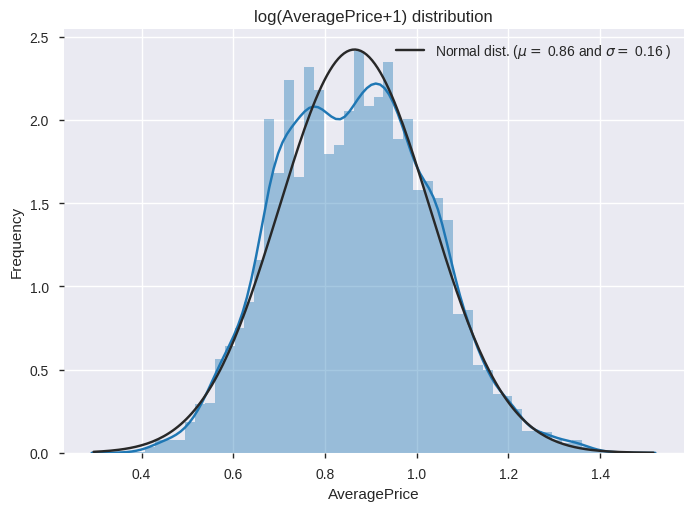

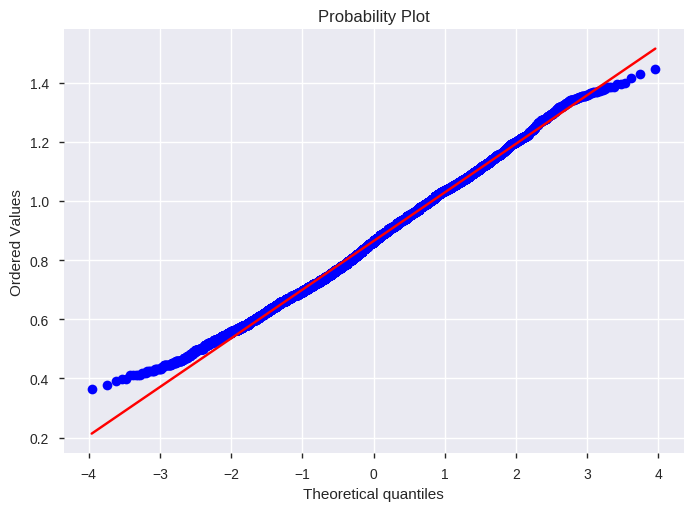

In [31]:
sns.distplot(np.log1p(df['AveragePrice']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df['AveragePrice']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(AveragePrice+1) distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(df['AveragePrice']), plot=plt)
plt.show();

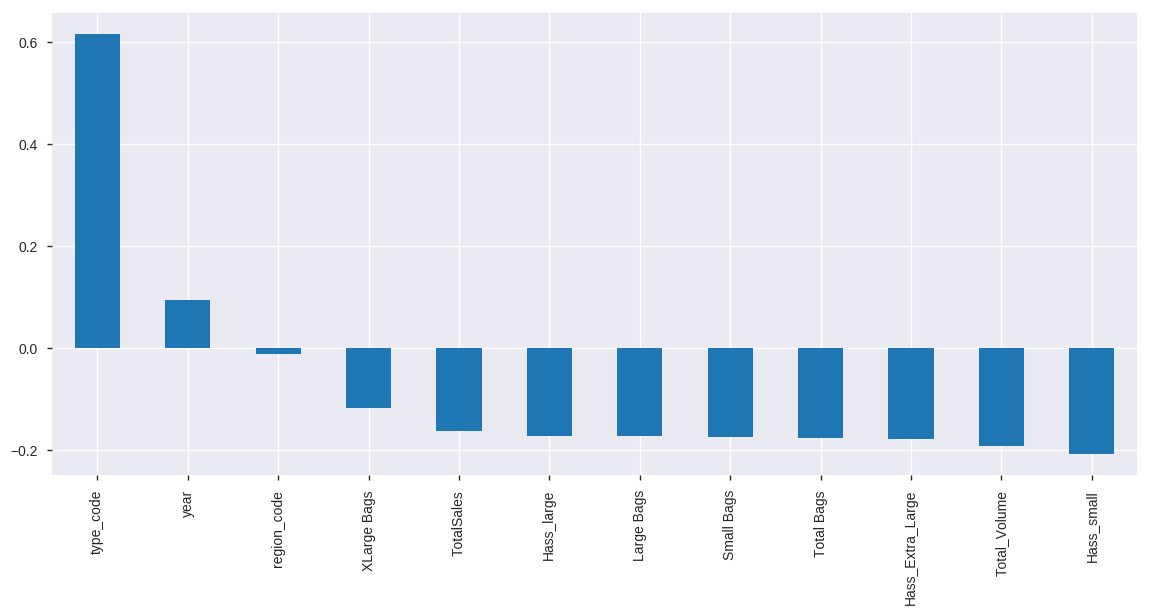

In [32]:
corr_with_sale_price = df.corr()["AveragePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_sale_price.drop("AveragePrice").plot.bar()
plt.show();

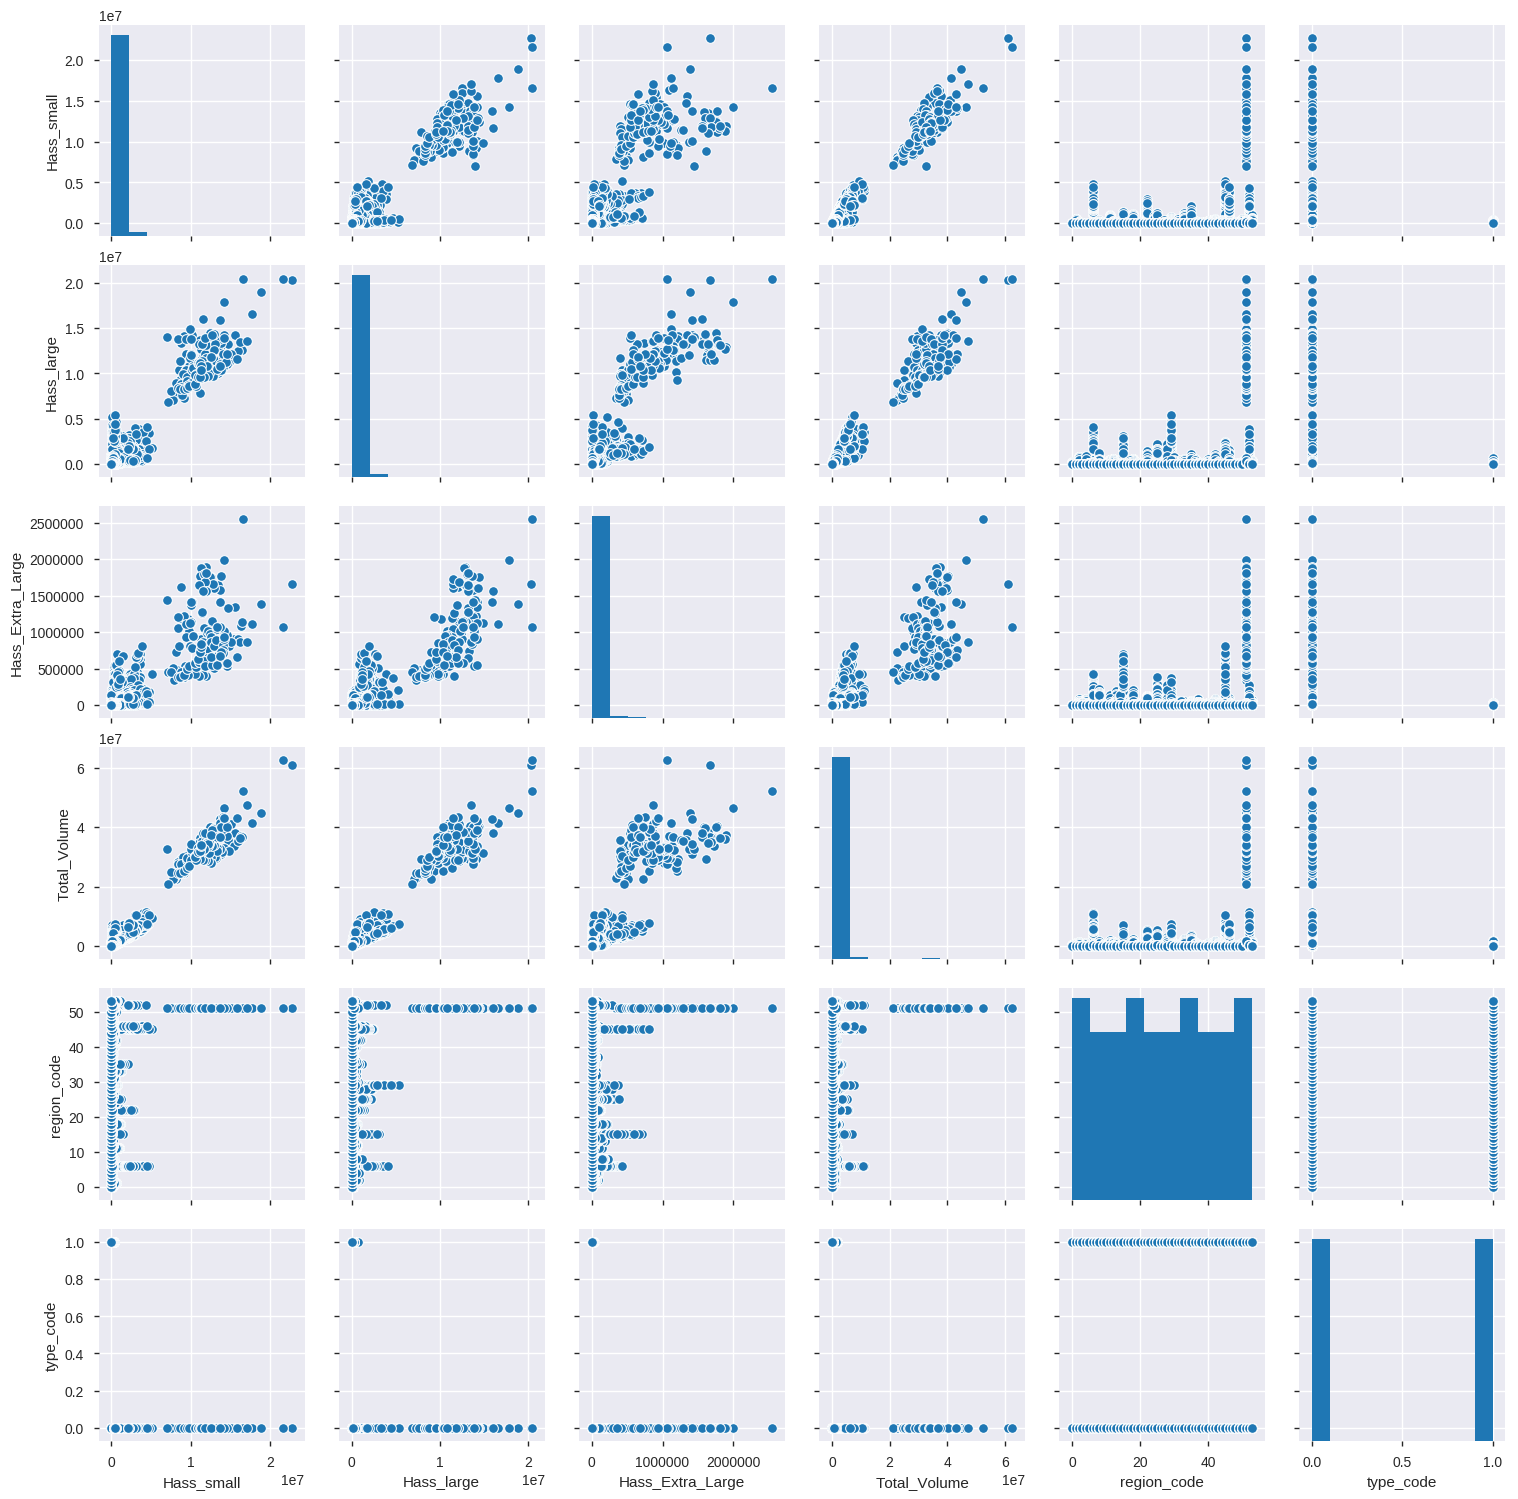

In [33]:
sns.pairplot(df[['Hass_small', 'Hass_large', 'Hass_Extra_Large', 'Total_Volume','region_code','type_code']])
plt.show();

In [0]:
df["AveragePrice"] = np.log1p(df["AveragePrice"])

#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])

In [0]:
df = pd.get_dummies(df)
df = df.fillna(df.mean())

In [0]:
X, y = df.drop(['AveragePrice'], axis = 1), df['AveragePrice']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)

[23:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.5384424586351395
Test r2 score:  0.7220107060711547
Train RMSE: 0.0831
Test RMSE: 0.0868


In [39]:
xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train)
y_pred2 = xgb_model2.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

[23:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.974774889007927
Test r2 score:  0.9560243286018628
Train RMSE: 0.0253
Test RMSE: 0.0345


In [40]:
xgb_model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model3.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred3 = xgb_model3.predict(X_train)
y_pred3 = xgb_model3.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred3, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred3))
train_mse3 = mean_squared_error(y_train_pred3, y_train)
test_mse3 = mean_squared_error(y_pred3, y_test)
train_rmse3 = np.sqrt(train_mse3)
test_rmse3 = np.sqrt(test_mse3)
print('Train RMSE: %.4f' % train_rmse3)
print('Test RMSE: %.4f' % test_rmse3)

[23:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9149284268213854
Test r2 score:  0.9044312407081321
Train RMSE: 0.0435
Test RMSE: 0.0509


In [41]:
from collections import OrderedDict
OrderedDict(sorted(xgb_model2.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('TotalSales', 1276),
             ('Total_Volume', 1117),
             ('Hass_large', 634),
             ('Large Bags', 474),
             ('Hass_small', 413),
             ('Total Bags', 392),
             ('Small Bags', 263),
             ('Hass_Extra_Large', 206),
             ('region_code', 172),
             ('year', 114),
             ('XLarge Bags', 113),
             ('type_code', 104),
             ('region_HartfordSpringfield', 45),
             ('region_DallasFtWorth', 35),
             ('region_GrandRapids', 34),
             ('region_Houston', 30),
             ('region_CincinnatiDayton', 30),
             ('region_Denver', 29),
             ('region_SanFrancisco', 28),
             ('region_LosAngeles', 26),
             ('Date_2017-09-17', 25),
             ('Date_2017-09-03', 24),
             ('region_Northeast', 21),
             ('Date_2017-10-08', 21),
             ('Date_2017-10-01', 21),
             ('region_BuffaloRochester', 21),
             ('r

In [42]:
most_relevant_features= list( dict((k, v) for k, v in xgb_model2.get_booster().get_fscore().items() if v >= 4).keys())
print(most_relevant_features)

['type_code', 'Hass_small', 'year', 'TotalSales', 'Large Bags', 'region_Houston', 'region_HartfordSpringfield', 'region_SanFrancisco', 'region_PhoenixTucson', 'Hass_large', 'XLarge Bags', 'region_code', 'Total Bags', 'Hass_Extra_Large', 'Total_Volume', 'Date_2017-02-05', 'region_Northeast', 'Date_2017-10-08', 'region_SouthCentral', 'region_DallasFtWorth', 'Small Bags', 'region_NewYork', 'Date_2017-09-03', 'region_Nashville', 'Date_2017-09-17', 'Date_2017-10-01', 'Date_2017-09-24', 'Date_2017-09-10', 'Date_2016-10-30', 'Date_2018-02-04', 'region_Boise', 'region_Louisville', 'Date_2017-08-27', 'region_Philadelphia', 'Date_2016-11-06', 'Date_2017-10-15', 'region_StLouis', 'region_Roanoke', 'Date_2017-02-12', 'Date_2017-08-20', 'Date_2017-01-22', 'region_RichmondNorfolk', 'Date_2016-11-13', 'region_CincinnatiDayton', 'region_MiamiFtLauderdale', 'region_Plains', 'region_Midsouth', 'Date_2016-02-07', 'region_Columbus', 'Date_2017-01-01', 'Date_2016-10-23', 'region_Sacramento', 'region_LosAng

In [0]:
# create training and test datasets
np.random.seed(1234)
df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))
df_train = df[df['runiform'] >= 0.33]
df_test = df[df['runiform'] < 0.33]

In [44]:
# check training data frame
print('\SusItems_train data frame (rows, columns): ',df_train.shape)
print(df_train.head())

\SusItems_train data frame (rows, columns):  (12272, 239)
   AveragePrice  Total_Volume  ...  region_WestTexNewMexico  runiform
1         0.854        10.913  ...                        0     0.622
2         0.658        11.680  ...                        0     0.438
3         0.732        11.277  ...                        0     0.785
4         0.824        10.840  ...                        0     0.780
7         0.683        11.603  ...                        0     0.802

[5 rows x 239 columns]


In [45]:
# check test data frame
print('\SusItems_test data frame (rows, columns): ',df_test.shape)
print(df_test.head())

\SusItems_test data frame (rows, columns):  (5977, 239)
    AveragePrice  Total_Volume  ...  region_WestTexNewMexico  runiform
0          0.846        11.070  ...                        0     0.192
5          0.815        10.933  ...                        0     0.273
6          0.688        11.332  ...                        0     0.276
17         0.728        11.568  ...                        0     0.014
22         0.747        11.578  ...                        0     0.075

[5 rows x 239 columns]


In [46]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("AveragePrice ~ Hass_small + Hass_large + Hass_Extra_Large + Total_Volume", df_train, groups=df_train["type_code"])

model2f = model2.fit()

print(model2f.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: AveragePrice
No. Observations:   12272   Method:             REML        
No. Groups:         2       Scale:              0.0148      
Min. group size:    6111    Likelihood:         8400.5195   
Max. group size:    6161    Converged:          Yes         
Mean group size:    6136.0                                  
------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         1.153    0.070  16.531 0.000  1.017  1.290
Hass_small       -0.000    0.001  -0.660 0.510 -0.002  0.001
Hass_large        0.028    0.001  29.289 0.000  0.026  0.030
Hass_Extra_Large  0.001    0.001   2.018 0.044  0.000  0.002
Total_Volume     -0.050    0.002 -28.371 0.000 -0.054 -0.047
Group Var         0.010    0.103                            



**AveragePrice = 1.153 + 0.028 * Hass_large + 0.001 * Hass_Extra_Large - Total_Volume * 0.050**

In [0]:
data = pd.read_csv('avocado.csv')

In [0]:
data_organic = data.loc[data['type'] == 'organic']
data_organic = data[['Date','AveragePrice']]

In [55]:
data_organic = data_organic.rename(index=str, columns={"AveragePrice": "y", "Date": "ds"})
data_organic.head()

,ds,y
0,2015-12-27,1.330
1,2015-12-20,1.350
2,2015-12-13,0.930
3,2015-12-06,1.080
4,2015-11-29,1.280


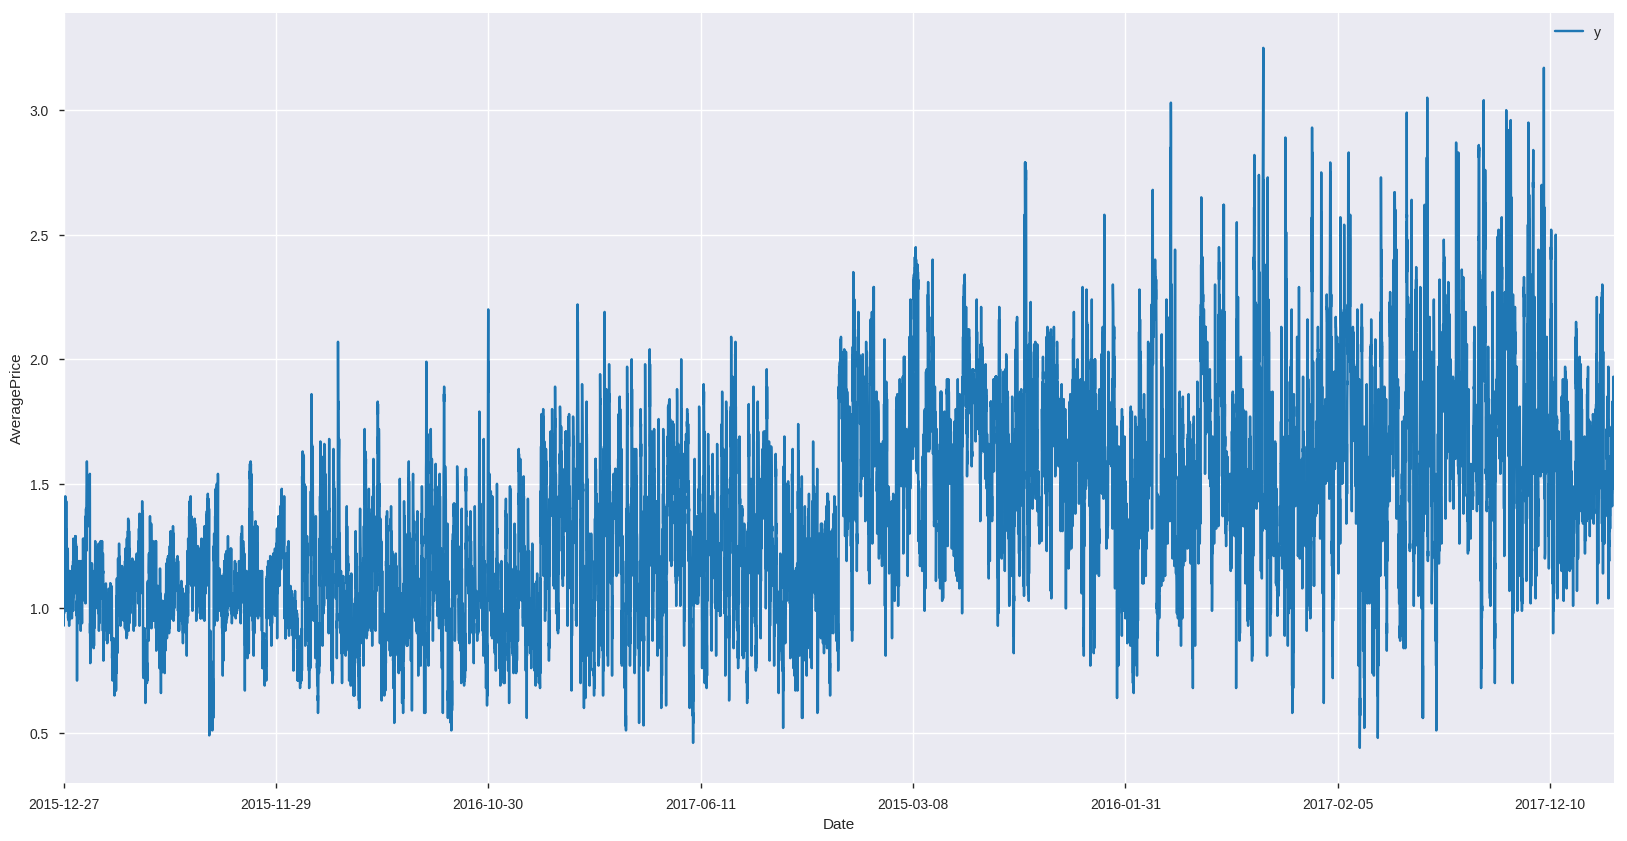

In [56]:
ax = data_organic.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('AveragePrice')
ax.set_xlabel('Date')

plt.show()

In [60]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(data_organic)

In [61]:
future_dates = bev_model.make_future_dataframe(periods=3, freq='M')
future_dates.tail()

,ds
18247,2018-03-25
18248,2018-03-25
18249,2018-03-31
18250,2018-04-30
18251,2018-05-31


In [62]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18247,2018-03-25,1.350,0.621,2.071
18248,2018-03-25,1.350,0.627,2.090
18249,2018-03-31,1.363,0.573,2.091
18250,2018-04-30,1.327,0.635,2.106
18251,2018-05-31,1.364,0.646,2.086


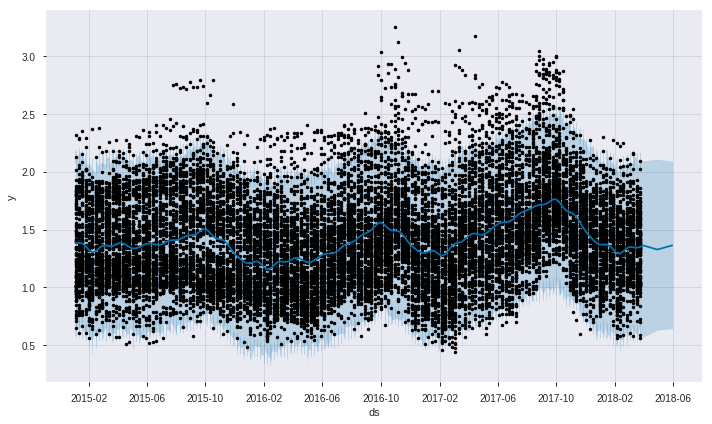

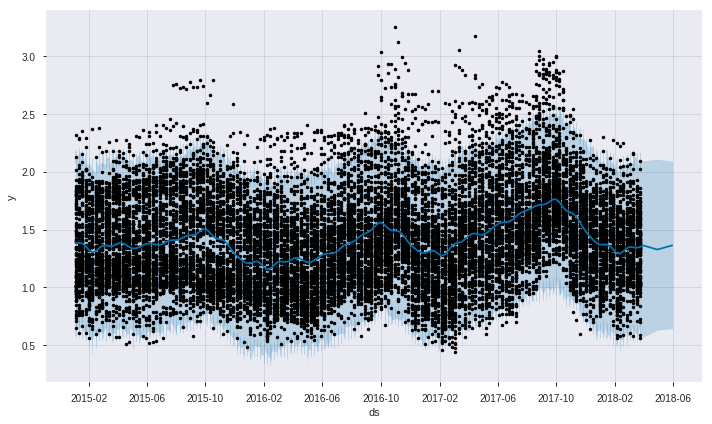

In [63]:
# MODEL

bev_model.plot(forecast, uncertainty=True)

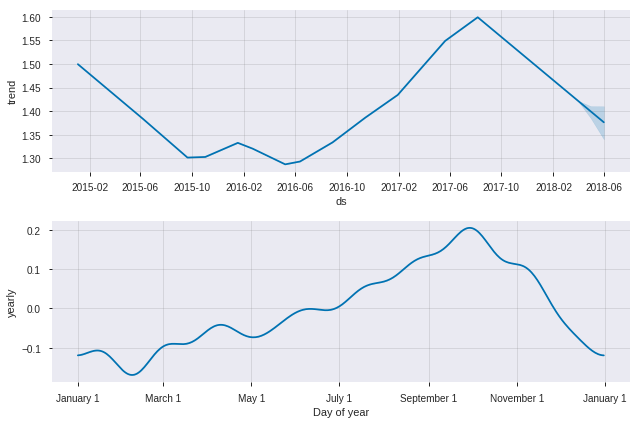

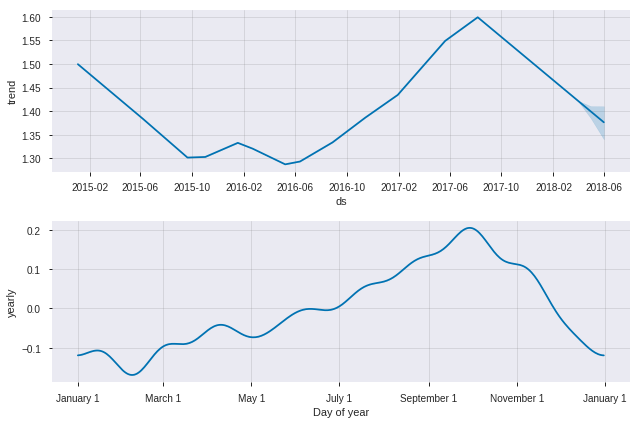

In [64]:
# INTERPRET

bev_model.plot_components(forecast)

In [0]:
data_conventional = data.loc[data['type'] == 'conventional']
data_conventional = data[['Date','AveragePrice']]

In [66]:
data_conventional = data_conventional.rename(index=str, columns={"AveragePrice": "y", "Date": "ds"})
data_conventional.head()

,ds,y
0,2015-12-27,1.330
1,2015-12-20,1.350
2,2015-12-13,0.930
3,2015-12-06,1.080
4,2015-11-29,1.280


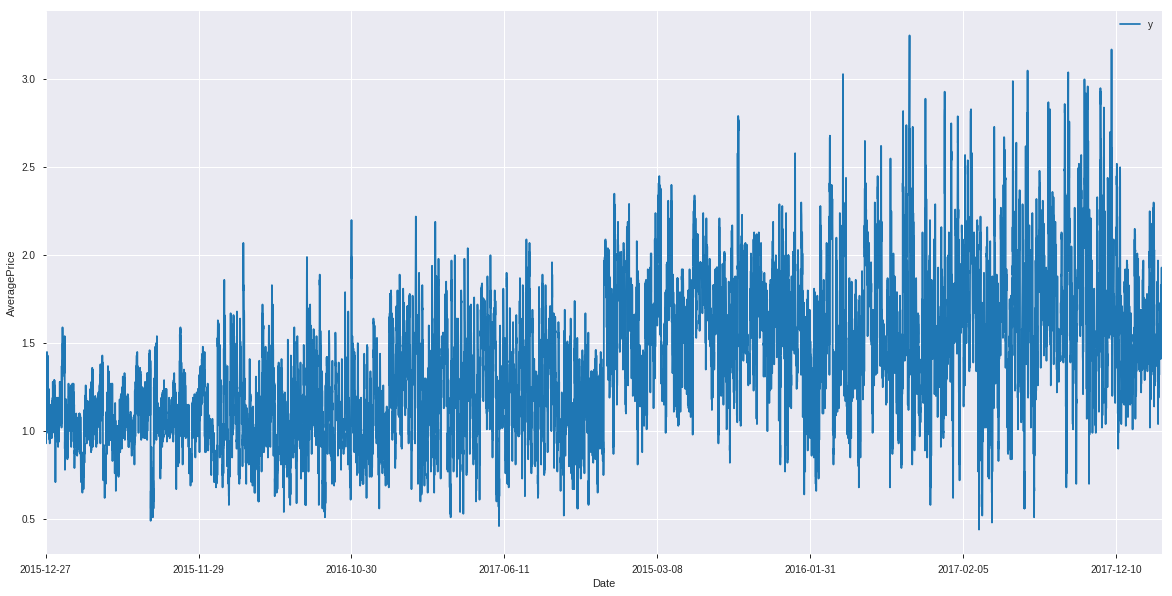

In [67]:
ax = data_conventional.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('AveragePrice')
ax.set_xlabel('Date')

plt.show()

In [69]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(data_conventional)

In [70]:
future_dates = bev_model.make_future_dataframe(periods=3, freq='M')
future_dates.tail()

,ds
18247,2018-03-25
18248,2018-03-25
18249,2018-03-31
18250,2018-04-30
18251,2018-05-31


In [71]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18247,2018-03-25,1.350,0.605,2.105
18248,2018-03-25,1.350,0.606,2.104
18249,2018-03-31,1.363,0.618,2.107
18250,2018-04-30,1.327,0.601,2.078
18251,2018-05-31,1.364,0.657,2.118


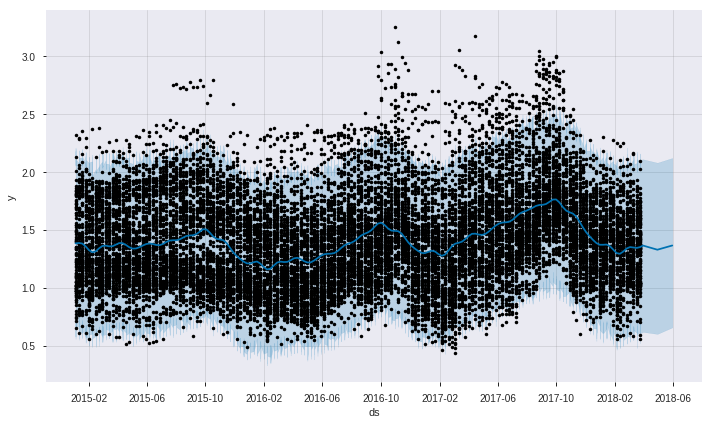

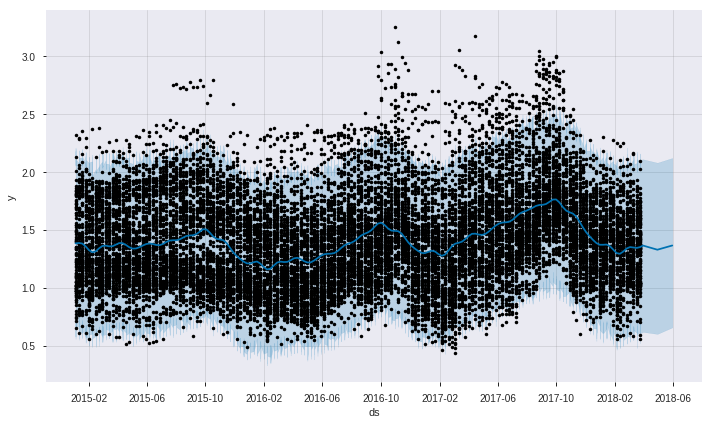

In [72]:
# MODEL

bev_model.plot(forecast, uncertainty=True)

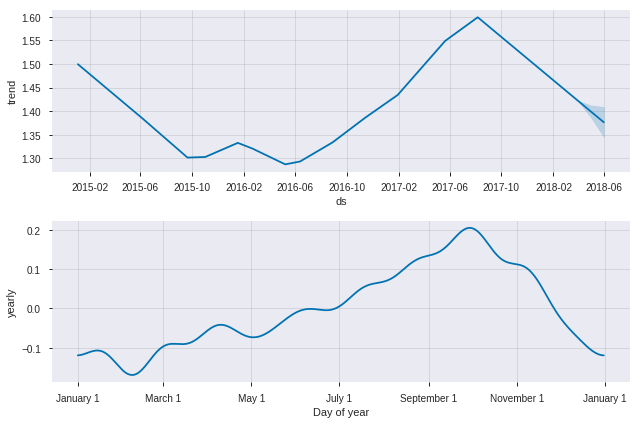

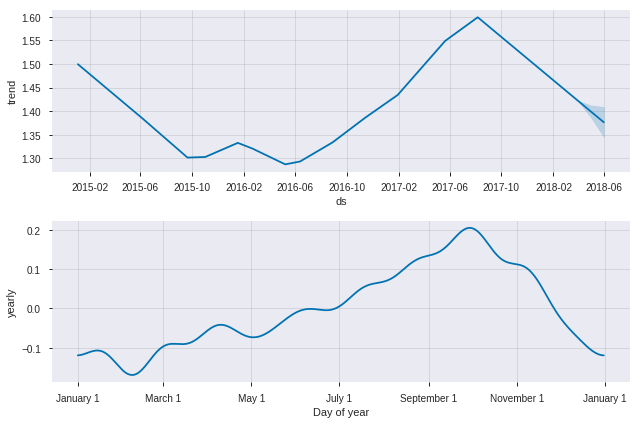

In [73]:
# INTERPRET

bev_model.plot_components(forecast)